In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs

x,y = make_blobs(n_samples=60, centers=2, random_state=30, cluster_std=0.8) # generate sample

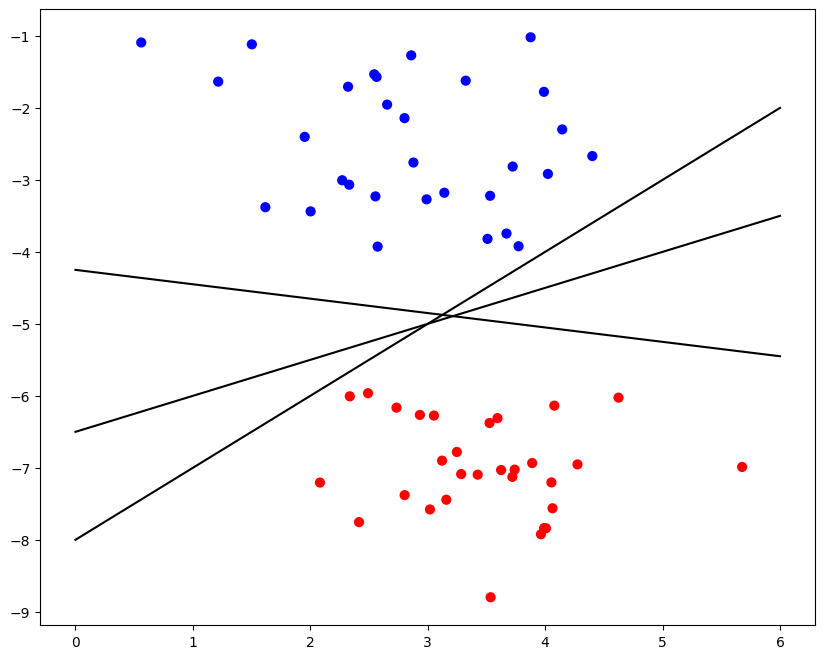

In [2]:
plt.figure(figsize=(10,8)) #plot
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap='bwr')

#draw three split lines
x_temp = np.linspace(0,6)
for m, b in [(1,-8),(0.5,-6.5),(-0.2,-4.25)]:
  y_temp = m * x_temp + b
  plt.plot(x_temp,y_temp,'-k')



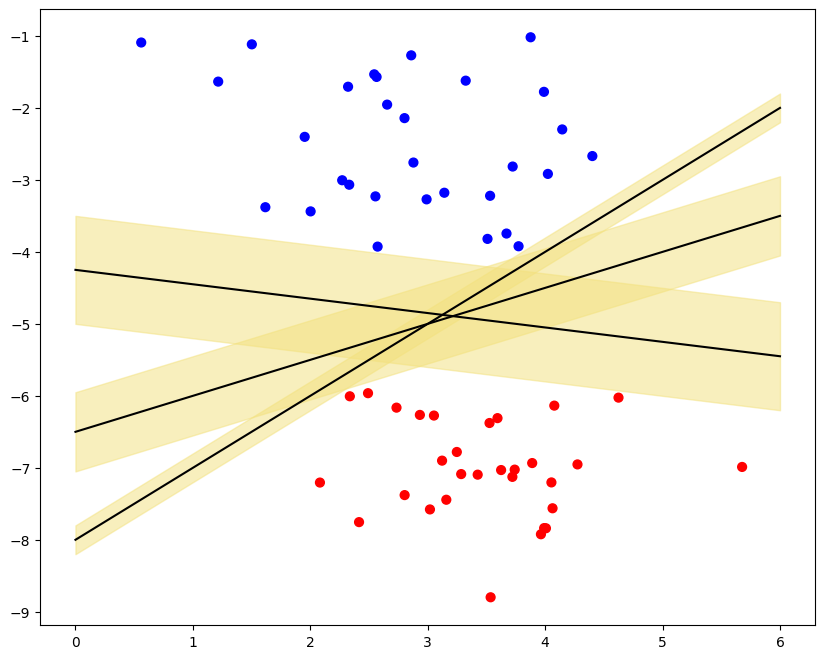

In [3]:
plt.figure(figsize=(10,8)) #plot
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap='bwr')

#draw three split lines
x_temp = np.linspace(0,6)
for m, b, d in [(1,-8,0.2),(0.5,-6.5,0.55),(-0.2,-4.25,0.75)]:
  y_temp = m * x_temp + b
  plt.plot(x_temp,y_temp,'-k')
  plt.fill_between(x_temp,y_temp -d , y_temp+d,color='#f3e17d',alpha =0.5)

In [4]:
from sklearn.svm import SVC

liner_svc = SVC(kernel='linear').fit(x,y)
liner_svc

SVC(kernel='linear')

In [5]:
liner_svc.support_vectors_

array([[ 2.57325754, -3.92687452],
       [ 2.49156506, -5.96321164],
       [ 4.62473719, -6.02504452]])

In [6]:
def svc_plot(model):

    # Get the current axes submap data and prepare for drawing the split line
    ax = plt.gca()
    x = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 50)
    y = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 50)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # Draw a dividing line using the outline method
    ax.contour(X, Y, P, colors='green', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

    # Mark the location of the support vector
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], c='green', s=100)

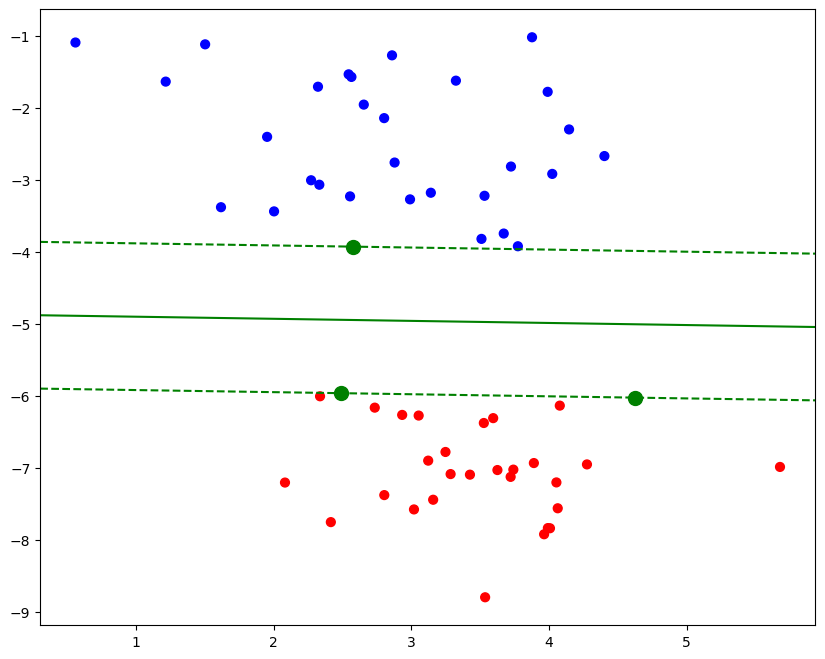

In [7]:
plt.figure(figsize=(10,8)) #plot
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap='bwr')
svc_plot(liner_svc)

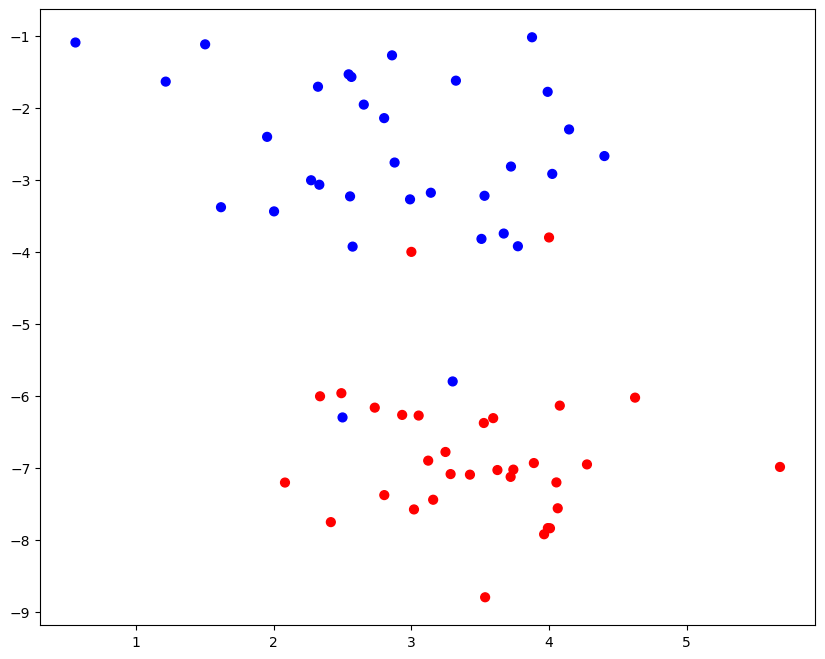

In [8]:
x = np.concatenate((x, np.array([[3,-4],[4,-3.8],[2.5,-6.3],[3.3,-5.8]])))
y = np.concatenate((y, np.array([1,1,0,0])))
plt.figure(figsize=(10,8)) #plot
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap='bwr')


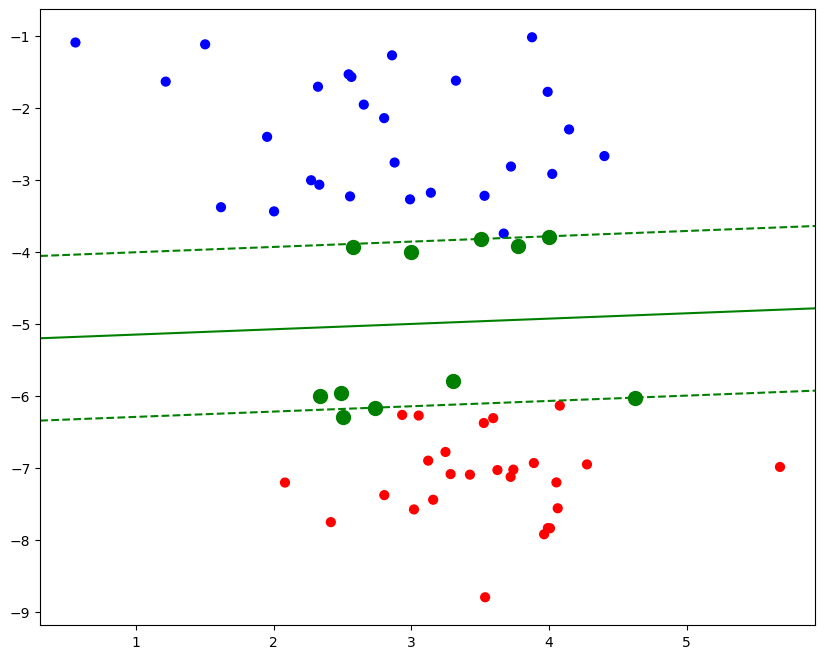

In [9]:
liner_svc.fit(x,y) # train
 # plot
plt.figure(figsize=(10,8)) #plot
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap='bwr')
svc_plot(liner_svc)

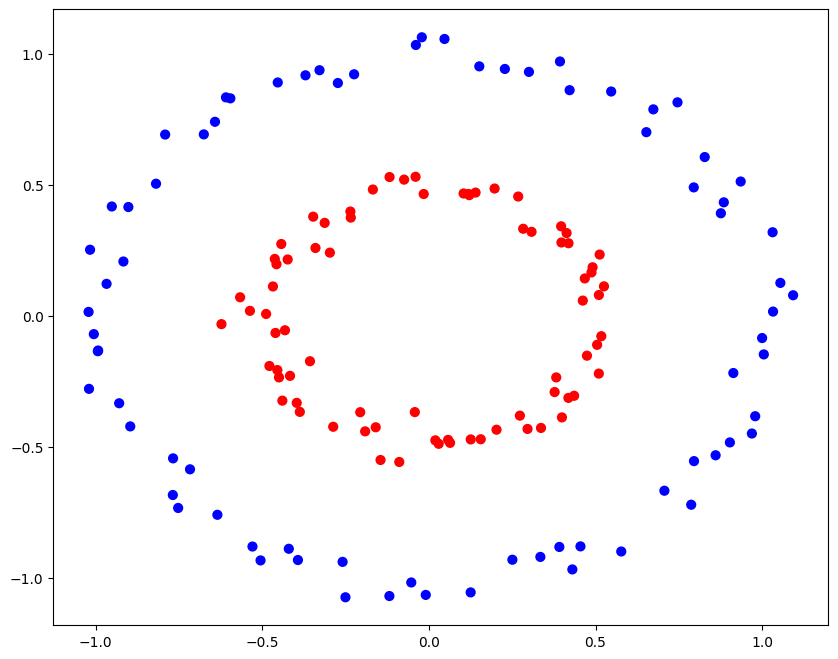

In [10]:
from sklearn.datasets import make_circles
x2,y2 = make_circles(150, factor=.5, noise=.05)
plt.figure(figsize=(10,8)) #plot
plt.scatter(x2[:, 0], x2[:, 1], c=y2, s=40, cmap='bwr') # plot


In [11]:
def kernel_function(xi, xj):
    poly = np.exp(-(xi**2 + xj**2))
    return poly

Text(0.5, 0, 'r')

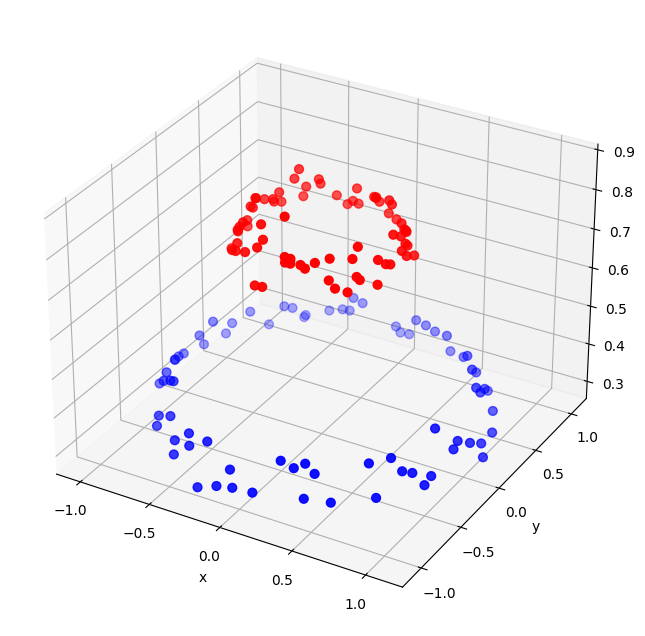

In [12]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

r = kernel_function(x2[:,0], x2[:,1])
plt.figure(figsize=(10, 8))
ax = plt.subplot(projection='3d')
ax.scatter3D(x2[:, 0], x2[:, 1], r, c=y2, s=40, cmap='bwr')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')

In [13]:
rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(x2, y2)

SVC()

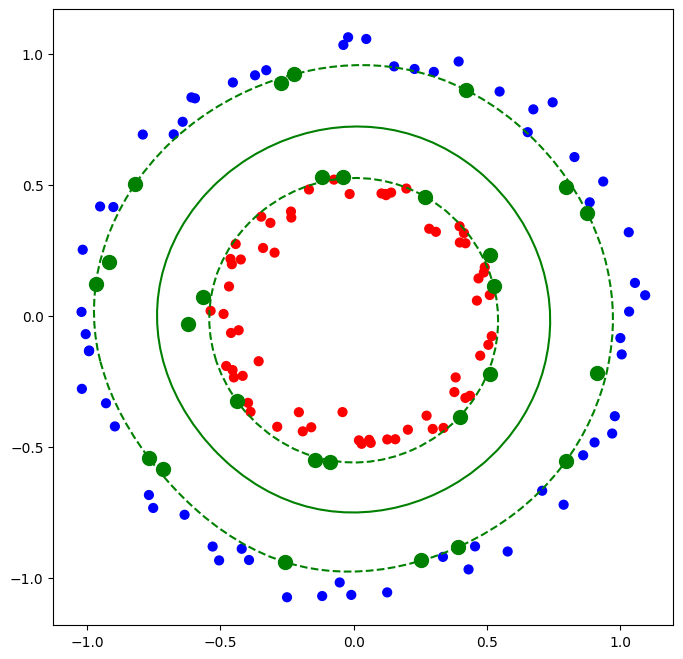

In [14]:
plt.figure(figsize=(8, 8))
plt.scatter(x2[:, 0], x2[:, 1], c=y2, s=40, cmap='bwr')

svc_plot(rbf_svc)